Train ratio: 0.6, Test ratio: 0.4
Evaluation Metrics:
Precision: 0.036567384
Accuracy: 0.036567384
Recall: 0.036567384
F1-Score: 0.036567384
-------------------
Train ratio: 0.7, Test ratio: 0.3
Evaluation Metrics:
Precision: 0.038740043
Accuracy: 0.038740043
Recall: 0.038740043
F1-Score: 0.038740043
-------------------
Train ratio: 0.8, Test ratio: 0.2
Evaluation Metrics:
Precision: 0.046497585
Accuracy: 0.046497585
Recall: 0.046497585
F1-Score: 0.046497585
-------------------
Train ratio: 0.9, Test ratio: 0.1
Evaluation Metrics:
Precision: 0.041052632
Accuracy: 0.041052632
Recall: 0.041052632
F1-Score: 0.041052632
-------------------


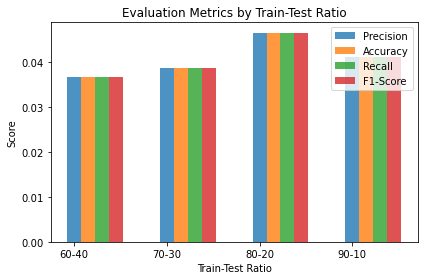

In [2]:
import random
import string
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

class SVMNextWordPredictor:
    def __init__(self):
        self.vectorizer = CountVectorizer()
        self.clf = LinearSVC()

    def train(self, corpus, window_size=3):
        X, y = self.generate_data(corpus, window_size)
        X = self.vectorizer.fit_transform(X)
        self.clf.fit(X, y)

    def generate_data(self, corpus, window_size):
        X = []
        y = []
        for sentence in corpus:
            words = sentence.split()
            for i in range(len(words) - window_size):
                X.append(' '.join(words[i:i+window_size]))
                y.append(words[i+window_size])
        return X, y

    def predict(self, prefix):
        prefix_vector = self.vectorizer.transform([prefix])
        predicted_word = self.clf.predict(prefix_vector.reshape(1, -1))
        return predicted_word[0]


dataset_file = "imdb_movies.csv"  # Replace with the path to your Kaggle dataset file
text_column = "overview"  # Replace with the column name containing the text data

# Load the Kaggle dataset into a DataFrame
data = pd.read_csv(dataset_file)

# Extract the text column from the DataFrame
corpus = data[text_column].tolist()
corpus = corpus[:200]
# corpus = ["I am going to the store", "I am going to the park", "I am going to the movies"]

# Define the train-test split ratios
split_ratios = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Initialize dictionaries to store evaluation scores for each ratio
precision_scores = {}
accuracy_scores = {}
recall_scores = {}
f1_scores = {}

for train_ratio, test_ratio in split_ratios:
    random.shuffle(corpus)  # Shuffle the corpus randomly

    train_size = int(train_ratio * len(corpus))
    train_corpus = corpus[:train_size]
    test_corpus = corpus[train_size:]

    predictor = SVMNextWordPredictor()
    predictor.train(train_corpus)

    print(f"Train ratio: {train_ratio}, Test ratio: {test_ratio}")

    # Perform predictions on the test corpus
    true_labels = []
    predicted_labels = []
    for sentence in test_corpus:
        tokens = sentence.split()
        for i in range(len(tokens) - 1):
            prefix = " ".join(tokens[:i+1])
            next_word = tokens[i+1]
            predicted_next_word = predictor.predict(prefix)
            true_labels.append(next_word)
            predicted_labels.append(predicted_next_word)

    # Calculate evaluation metrics
    precision = precision_score(true_labels, predicted_labels, average='micro')
    accuracy = accuracy_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels, average='micro')
    f1 = f1_score(true_labels, predicted_labels, average='micro')

    # Store scores in dictionaries
    precision_scores[train_ratio] = precision
    accuracy_scores[train_ratio] = accuracy
    recall_scores[train_ratio] = recall
    f1_scores[train_ratio] = f1

    print("Evaluation Metrics:")
    print(f"Precision: {precision:.9f}")
    print(f"Accuracy: {accuracy:.9f}")
    print(f"Recall: {recall:.9f}")
    print(f"F1-Score: {f1:.9f}")
    print("-------------------")

# plot bar graph
ratios = list(precision_scores.keys())
metrics = ['Precision', 'Accuracy', 'Recall', 'F1-Score']
scores = [precision_scores, accuracy_scores, recall_scores, f1_scores]

x = np.arange(len(ratios))  # X-axis values

fig, ax = plt.subplots()
bar_width = 0.15
opacity = 0.8

# Plotting the bars for each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, [scores[i][ratio] for ratio in ratios], bar_width, alpha=opacity, label=metric)

ax.set_ylabel('Score')
ax.set_xlabel('Train-Test Ratio')
ax.set_title('Evaluation Metrics by Train-Test Ratio')
ax.set_xticks(x)
ax.set_xticklabels([f"{int(train_ratio*100)}-{int(test_ratio*100)}" for train_ratio, test_ratio in split_ratios])
ax.legend()

plt.tight_layout()
plt.show()
